In [1]:
#Importing the appropriate modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
%matplotlib inline

In [2]:
#Creating a DataFrame.
file = 'C:/Users/kzarb/Desktop/python_data_analysis/immigration_data_analysis/immigration_data.csv'
df = pd.read_csv(file)
#This is to avoid SettingWithCopyWarning.
pd.options.mode.chained_assignment = None 
#This is to proactively know the dtypes we have deal with in case changes are needed.
datatypes = df.dtypes
print(datatypes)

year_month          object
month_of_release    object
passenger_type      object
direction           object
sex                 object
age                 object
estimate             int64
standard_error       int64
status              object
dtype: object


In [3]:
#Changing the column name "year_month" to "date", mostlty for aesthetic reasons.
df =df.rename(columns={"year_month":"date"})
#This conversion was nessesary cause months where also present in the column.
#Later on this will be converted to int64, as my goal is to make graphs per annum.
df["date"] = pd.to_datetime(df["date"],format='%Y-%m-%d')

In [4]:
#Educated guess: The column "month_of_release" describes the month that the data were released.
#The assesment derives from the fact that this column has a range of dates between 2020 and 2021.
df["month_of_release"] = pd.to_datetime(df["month_of_release"],format='%Y-%m-%d')
df.month_of_release.max()
print(f"minimum date of month_of_release:        {df.month_of_release.min():}\n"
      f"maximum date of month_of_release:        {df.month_of_release.max()}")
#By doing a simple google search such as : country's visa processing time the maximum time for 
#the prosess to be completed is 46 months for skilled migrants.
educated_guess_support = df["month_of_release"] - df["date"]
educated_guess_support = educated_guess_support.mean()
print(f"mean numeric difference between columns: {educated_guess_support}\n"
      f"There is no need for further analysis considering this.")

minimum date of month_of_release:        2020-09-01 00:00:00
maximum date of month_of_release:        2022-06-01 00:00:00
mean numeric difference between columns: 3340 days 02:51:56.361735488
There is no need for further analysis considering this.


In [5]:
#There is no need to have this column for what I want to do so I'll drop it off the df.
df = df.drop(columns=["month_of_release"],axis=1)

In [6]:
print(f' passenger_type :{df.passenger_type.unique()}\n',
f'direction :{df.direction.unique()}\n',
f'sex :{df.sex.unique()}\n',
f'age :{df.age.unique()}\n',
f'status :{df.status.unique()}')

 passenger_type :['Long-term migrant']
 direction :['Arrivals' 'Departures' 'Net']
 sex :['Female' 'Male' 'TOTAL']
 age :['0-4 years' '10-14 years' '15-19 years' '20-24 years' '25-29 years'
 '30-34 years' '35-39 years' '40-44 years' '45-49 years' '50-54 years'
 '55-59 years' '5-9 years' '60-64 years' '65-69 years' '70-74 years'
 '75-79 years' '80-84 years' '85-89 years' '90+ years' 'TOTAL']
 status :['Final' 'Provisional']


In [7]:
df = df.drop(columns=["passenger_type"],axis=1)

In [8]:
df_net = df.estimate.loc[(df.direction == "Net") & (df.sex =="TOTAL") & (df.age == "TOTAL")].sum()
df_arrivals =df.estimate.loc[(df.direction == "Arrivals") & (df.sex =="TOTAL") & (df.age == "TOTAL")].sum()
df_departures =df.estimate.loc[(df.direction == "Departures") & (df.sex =="TOTAL") & (df.age == "TOTAL")].sum()
if df_net != df_arrivals - df_departures:
     print(f' Provided Net sum: {df_net}\n',
           f'Arrivals sum: {df_arrivals}\n',
           f'Departures sum: {df_departures}\n',
           f'Calculated Net sum: {df_arrivals - df_departures}\n'
           f' Deviation: {df_net - (df_arrivals - df_departures)} from the Provided Net sum')
else:
    print(f' Provided Net sum: {df_net}\n',
        f'Arrivals sum: {df_arrivals}\n',
        f'Departures sum: {df_departures}\n',
        f' No Deviation')
print("="*20)
    
df.estimate.loc[df.sex=="TOTAL"].sum()   
df_sex_tot = df.estimate.loc[(df.sex=="Female")].sum() + df.estimate.loc[(df.sex=="Male")].sum()
if df_sex_tot != (df.estimate.loc[df.sex=="TOTAL"].sum()):
    print(f' Provided Total sex sum:{df.estimate.loc[df.sex=="TOTAL"].sum()}\n'
          f' fem sum: {df.estimate.loc[(df.sex=="Female")].sum()}\n',
         f'mal sum: {df.estimate.loc[(df.sex=="Male")].sum()}\n',
         f'Calculated sum: {df_sex_tot}\n',
         f'Deviation: {df.estimate.loc[df.sex=="TOTAL"].sum() - df_sex_tot} from the Provided Sex sum')
else:
    print("ok")


 Provided Net sum: 570797
 Arrivals sum: 2469392
 Departures sum: 1898594
 Calculated Net sum: 570798
 Deviation: -1 from the Provided Net sum
 Provided Total sex sum:9877561
 fem sum: 4815165
 mal sum: 5062394
 Calculated sum: 9877559
 Deviation: 2 from the Provided Sex sum


As seen above the is some deviation. We might discover where this deviation derives from later on.

In [11]:
#loc method
#==========================================YEAR FILTERING 2001=======================================#
df_2001 =df[df["date"].dt.strftime("%Y")=="2001"]
#==========================================DIRECITION FILTERING======================================#
arrivals_2001 = df_2001["direction"]=="Arrivals"
departures_2001 = df_2001["direction"]=="Departures"
#==========================================AGE FILTERING=============================================#
total_age = df_2001["age"]=="TOTAL"
#==========================================SEX FILTERING=============================================#
total_sex = df_2001["sex"] == "TOTAL"
#========================================STATUS FILTERING=========================================++=#
final_status = df_2001["status"] == "Final"
provisional_status = df_2001["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2001= df_2001.loc[(arrivals_2001 & total_age & total_sex & final_status)]
#==========================================FINAL DEPARTURES FILTERING & DROP NULLS===============`===#
final_departures_estimation_2001 = df_2001.loc[(departures_2001 & total_age & total_sex & final_status)]
#==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2001 = df_2001.loc[(arrivals_2001 & total_age & total_sex & provisional_status)]
#==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2001 = df_2001.loc[(departures_2001 & total_age & total_sex & provisional_status)]
#===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2001 = final_arrivals_estimation_2001["estimate"].sum()
fd_2001 = final_departures_estimation_2001["estimate"].sum()
tf_2001 = fa_2001-fd_2001
# Provisional Status#
pa_2001 = provisional_arrivals_estimation_2001["estimate"].sum()
pd_2001 = provisional_departures_estimation_2001["estimate"].sum()
tp_2001 = pa_2001-pd_2001
# ===========================================TOTAL VISAS==============================================#
total_visas_2001 = tf_2001+tp_2001
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2001 : {fa_2001}\n'
      f'Final Departures 2001 : {fd_2001}\n'
      f'Total Final Visas 2001 : {tf_2001}\n'
      f'Provisional Arrivals 2001 : {pa_2001}\n'
      f'Provisional Departures 2001 : {pd_2001}\n'
      f'Total Provisional Visas 2001 : {tp_2001}\n'
      f'Total Visas 2001 : {total_visas_2001}')

Final Arrivals 2001 : 114597
Final Departures 2001 : 84332
Total Final Visas 2001 : 30265
Provisional Arrivals 2001 : 0
Provisional Departures 2001 : 0
Total Provisional Visas 2001 : 0
Total Visas 2001 : 30265


In [63]:
#Using where() method alongside with dropna() method to achieve the same result
#==========================================YEAR FILTERING 2001=======================================#
df_2001 =df[df["date"].dt.strftime("%Y")=="2001"]
#==========================================DIRECITION FILTERING======================================#
arrivals_2001 = df_2001["direction"]=="Arrivals"
departures_2001 = df_2001["direction"]=="Departures"
#==========================================AGE FILTERING=============================================#
total_age = df_2001["age"]=="TOTAL"
#==========================================SEX FILTERING=============================================#
total_sex = df_2001["sex"] == "TOTAL"
#========================================STATUS FILTERING=========================================++=#
final_status = df_2001["status"] == "Final"
provisional_status = df_2001["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2001= df_2001.where(arrivals_2001 & total_age & total_sex & final_status)
final_arrivals_estimation_2001.dropna()
#==========================================FINAL DEPARTURES FILTERING & DROP NULLS===============`===#
final_departures_estimation_2001 = df_2001.where(departures_2001 & total_age & total_sex & final_status)
final_departures_estimation_2001.dropna()
#==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2001 = df_2001.where(arrivals_2001 & total_age & total_sex & provisional_status)
provisional_arrivals_estimation_2001.dropna()
#==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2001 = df_2001.where(departures_2001 & total_age & total_sex & provisional_status)
provisional_departures_estimation_2001.dropna()
#===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2001 = final_arrivals_estimation_2001["estimate"].sum()
fd_2001 = final_departures_estimation_2001["estimate"].sum()
tf_2001 = fa_2001-fd_2001
# Provisional Status#
pa_2001 = provisional_arrivals_estimation_2001["estimate"].sum()
pd_2001 = provisional_departures_estimation_2001["estimate"].sum()
tp_2001 = pa_2001-pd_2001
# ===========================================TOTAL VISAS==============================================#
total_visas_2001 = tf_2001+tp_2001
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2001 : {fa_2001}\n'
      f'Final Departures 2001 : {fd_2001}\n'
      f'Total Final Visas 2001 : {tf_2001}\n'
      f'Provisional Arrivals 2001 : {pa_2001}\n'
      f'Provisional Departures 2001 : {pd_2001}\n'
      f'Total Provisional Visas 2001 : {tp_2001}\n'
      f'Total Visas 2001 : {total_visas_2001}')

Final Arrivals 2001 : 114597.0
Final Departures 2001 : 84332.0
Total Final Visas 2001 : 30265.0
Provisional Arrivals 2001 : 0.0
Provisional Departures 2001 : 0.0
Total Provisional Visas 2001 : 0.0
Total Visas 2001 : 30265.0


In [62]:
# ==========================================YEAR FILTERING 2002============================================#
df_2002 =df[df["date"].dt.strftime("%Y")=="2002"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2002 = df_2002["direction"]=="Arrivals"
departures_2002 = df_2002["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2002["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2002["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2002["status"] == "Final"
provisional_status = df_2002["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2002= df_2002.loc[(arrivals_2002 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2002 = df_2002.loc[(departures_2002 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2002 = df_2002.loc[(arrivals_2002 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2002 = df_2002.loc[(departures_2002 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2002 = final_arrivals_estimation_2002["estimate"].sum()
fd_2002 = final_departures_estimation_2002["estimate"].sum()
tf_2002 = fa_2002-fd_2002
# Provisional Status#
pa_2002 = provisional_arrivals_estimation_2002["estimate"].sum()
pd_2002 = provisional_departures_estimation_2002["estimate"].sum()
tp_2002 = pa_2002-pd_2002
# ===========================================TOTAL VISAS==============================================#
total_visas_2002 = tf_2002+tp_2002
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2002 : {fa_2002}\n'
      f'Final Departures 2002 : {fd_2002}\n'
      f'Total Final Visas 2002 : {tf_2002}\n'
      f'Provisional Arrivals 2002 : {pa_2002}\n'
      f'Provisional Departures 2002 : {pd_2002}\n'
      f'Total Provisional Visas 2002 : {tp_2002}\n'
      f'Total Visas 2002 : {total_visas_2002}')

Final Arrivals 2002 : 134046
Final Departures 2002 : 73255
Total Final Visas 2002 : 60791
Provisional Arrivals 2002 : 0
Provisional Departures 2002 : 0
Total Provisional Visas 2002 : 0
Total Visas 2002 : 60791


In [64]:
# ==========================================YEAR FILTERING 2003============================================#
df_2003 =df[df["date"].dt.strftime("%Y")=="2003"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2003 = df_2003["direction"]=="Arrivals"
departures_2003 = df_2003["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2003["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2003["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2003["status"] == "Final"
provisional_status = df_2003["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2003= df_2003.loc[(arrivals_2003 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2003 = df_2003.loc[(departures_2003 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2003 = df_2003.loc[(arrivals_2003 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2003 = df_2003.loc[(departures_2003 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2003 = final_arrivals_estimation_2003["estimate"].sum()
fd_2003 = final_departures_estimation_2003["estimate"].sum()
tf_2003 = fa_2003-fd_2003
# Provisional Status#
pa_2003 = provisional_arrivals_estimation_2003["estimate"].sum()
pd_2003 = provisional_departures_estimation_2003["estimate"].sum()
tp_2003 = pa_2003-pd_2003
# ===========================================TOTAL VISAS==============================================#
total_visas_2003 = tf_2003+tp_2003
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2003 : {fa_2003}\n'
      f'Final Departures 2003 : {fd_2003}\n'
      f'Total Final Visas 2003 : {tf_2003}\n'
      f'Provisional Arrivals 2003 : {pa_2003}\n'
      f'Provisional Departures 2003 : {pd_2003}\n'
      f'Total Provisional Visas 2003 : {tp_2003}\n'
      f'Total Visas 2003 : {total_visas_2003}')

Final Arrivals 2003 : 120591
Final Departures 2003 : 79175
Total Final Visas 2003 : 41416
Provisional Arrivals 2003 : 0
Provisional Departures 2003 : 0
Total Provisional Visas 2003 : 0
Total Visas 2003 : 41416


In [65]:
# ==========================================YEAR FILTERING 2004============================================#
df_2004 =df[df["date"].dt.strftime("%Y")=="2004"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2004 = df_2004["direction"]=="Arrivals"
departures_2004 = df_2004["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2004["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2004["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2004["status"] == "Final"
provisional_status = df_2004["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2004= df_2004.loc[(arrivals_2004 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2004 = df_2004.loc[(departures_2004 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2004 = df_2004.loc[(arrivals_2004 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2004 = df_2004.loc[(departures_2004 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2004 = final_arrivals_estimation_2004["estimate"].sum()
fd_2004 = final_departures_estimation_2004["estimate"].sum()
tf_2004 = fa_2004-fd_2004
# Provisional Status#
pa_2004 = provisional_arrivals_estimation_2004["estimate"].sum()
pd_2004 = provisional_departures_estimation_2004["estimate"].sum()
tp_2004 = pa_2004-pd_2004
# ===========================================TOTAL VISAS==============================================#
total_visas_2004 = tf_2004+tp_2004
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2004 : {fa_2004}\n'
      f'Final Departures 2004 : {fd_2004}\n'
      f'Total Final Visas 2004 : {tf_2004}\n'
      f'Provisional Arrivals 2004 : {pa_2004}\n'
      f'Provisional Departures 2004 : {pd_2004}\n'
      f'Total Provisional Visas 2004 : {tp_2004}\n'
      f'Total Visas 2004 : {total_visas_2004}')

Final Arrivals 2004 : 103496
Final Departures 2004 : 89356
Total Final Visas 2004 : 14140
Provisional Arrivals 2004 : 0
Provisional Departures 2004 : 0
Total Provisional Visas 2004 : 0
Total Visas 2004 : 14140


In [66]:
# ==========================================YEAR FILTERING 2005============================================#
df_2005 =df[df["date"].dt.strftime("%Y")=="2005"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2005 = df_2005["direction"]=="Arrivals"
departures_2005 = df_2005["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2005["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2005["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2005["status"] == "Final"
provisional_status = df_2005["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2005= df_2005.loc[(arrivals_2005 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2005 = df_2005.loc[(departures_2005 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2005 = df_2005.loc[(arrivals_2005 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2005 = df_2005.loc[(departures_2005 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2005 = final_arrivals_estimation_2005["estimate"].sum()
fd_2005 = final_departures_estimation_2005["estimate"].sum()
tf_2005 = fa_2005-fd_2005
# Provisional Status#
pa_2005 = provisional_arrivals_estimation_2005["estimate"].sum()
pd_2005 = provisional_departures_estimation_2005["estimate"].sum()
tp_2005 = pa_2005-pd_2005
# ===========================================TOTAL VISAS==============================================#
total_visas_2005 = tf_2005+tp_2005
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2005 : {fa_2005}\n'
      f'Final Departures 2005 : {fd_2005}\n'
      f'Total Final Visas 2005 : {tf_2005}\n'
      f'Provisional Arrivals 2005 : {pa_2005}\n'
      f'Provisional Departures 2005 : {pd_2005}\n'
      f'Total Provisional Visas 2005 : {tp_2005}\n'
      f'Total Visas 2005 : {total_visas_2005}')

Final Arrivals 2005 : 103982
Final Departures 2005 : 92716
Total Final Visas 2005 : 11266
Provisional Arrivals 2005 : 0
Provisional Departures 2005 : 0
Total Provisional Visas 2005 : 0
Total Visas 2005 : 11266


In [67]:
# ==========================================YEAR FILTERING 2006============================================#
df_2006 =df[df["date"].dt.strftime("%Y")=="2006"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2006 = df_2006["direction"]=="Arrivals"
departures_2006 = df_2006["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2006["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2006["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2006["status"] == "Final"
provisional_status = df_2006["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2006= df_2006.loc[(arrivals_2006 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2006 = df_2006.loc[(departures_2006 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2006 = df_2006.loc[(arrivals_2006 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2006 = df_2006.loc[(departures_2006 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2006 = final_arrivals_estimation_2006["estimate"].sum()
fd_2006 = final_departures_estimation_2006["estimate"].sum()
tf_2006 = fa_2006-fd_2006
# Provisional Status#
pa_2006 = provisional_arrivals_estimation_2006["estimate"].sum()
pd_2006 = provisional_departures_estimation_2006["estimate"].sum()
tp_2006 = pa_2006-pd_2006
# ===========================================TOTAL VISAS==============================================#
total_visas_2006 = tf_2006+tp_2006
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2006 : {fa_2006}\n'
      f'Final Departures 2006 : {fd_2006}\n'
      f'Total Final Visas 2006 : {tf_2006}\n'
      f'Provisional Arrivals 2006 : {pa_2006}\n'
      f'Provisional Departures 2006 : {pd_2006}\n'
      f'Total Provisional Visas 2006 : {tp_2006}\n'
      f'Total Visas 2006 : {total_visas_2006}')

Final Arrivals 2006 : 110687
Final Departures 2006 : 93974
Total Final Visas 2006 : 16713
Provisional Arrivals 2006 : 0
Provisional Departures 2006 : 0
Total Provisional Visas 2006 : 0
Total Visas 2006 : 16713


In [68]:
# ==========================================YEAR FILTERING 2007============================================#
df_2007 =df[df["date"].dt.strftime("%Y")=="2007"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2007 = df_2007["direction"]=="Arrivals"
departures_2007 = df_2007["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2007["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2007["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2007["status"] == "Final"
provisional_status = df_2007["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2007= df_2007.loc[(arrivals_2007 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2007 = df_2007.loc[(departures_2007 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2007 = df_2007.loc[(arrivals_2007 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2007 = df_2007.loc[(departures_2007 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2007 = final_arrivals_estimation_2007["estimate"].sum()
fd_2007 = final_departures_estimation_2007["estimate"].sum()
tf_2007 = fa_2007-fd_2007
# Provisional Status#
pa_2007 = provisional_arrivals_estimation_2007["estimate"].sum()
pd_2007 = provisional_departures_estimation_2007["estimate"].sum()
tp_2007 = pa_2007-pd_2007
# ===========================================TOTAL VISAS==============================================#
total_visas_2007 = tf_2007+tp_2007
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2007 : {fa_2007}\n'
      f'Final Departures 2007 : {fd_2007}\n'
      f'Total Final Visas 2007 : {tf_2007}\n'
      f'Provisional Arrivals 2007 : {pa_2007}\n'
      f'Provisional Departures 2007 : {pd_2007}\n'
      f'Total Provisional Visas 2007 : {tp_2007}\n'
      f'Total Visas 2007 : {total_visas_2007}')

Final Arrivals 2007 : 113450
Final Departures 2007 : 102413
Total Final Visas 2007 : 11037
Provisional Arrivals 2007 : 0
Provisional Departures 2007 : 0
Total Provisional Visas 2007 : 0
Total Visas 2007 : 11037


In [69]:
# ==========================================YEAR FILTERING============================================#
df_2008 =df[df["date"].dt.strftime("%Y")=="2008"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2008 = df_2008["direction"]=="Arrivals"
departures_2008 = df_2008["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2008["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2008["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2008["status"] == "Final"
provisional_status = df_2008["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2008= df_2008.loc[(arrivals_2008 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2008 = df_2008.loc[(departures_2008 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2008 = df_2008.loc[(arrivals_2008 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2008 = df_2008.loc[(departures_2008 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2008 = final_arrivals_estimation_2008["estimate"].sum()
fd_2008 = final_departures_estimation_2008["estimate"].sum()
tf_2008 = fa_2008-fd_2008
# Provisional Status#
pa_2008 = provisional_arrivals_estimation_2008["estimate"].sum()
pd_2008 = provisional_departures_estimation_2008["estimate"].sum()
tp_2008 = pa_2008-pd_2008
# ===========================================TOTAL VISAS==============================================#
total_visas_2008 = tf_2008+tp_2008
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2008 : {fa_2008}\n'
      f'Final Departures 2008 : {fd_2008}\n'
      f'Total Final Visas 2008 : {tf_2008}\n'
      f'Provisional Arrivals 2008 : {pa_2008}\n'
      f'Provisional Departures 2008 : {pd_2008}\n'
      f'Total Provisional Visas 2008 : {tp_2008}\n'
      f'Total Visas 2008 : {total_visas_2008}')

Final Arrivals 2008 : 119994
Final Departures 2008 : 107723
Total Final Visas 2008 : 12271
Provisional Arrivals 2008 : 0
Provisional Departures 2008 : 0
Total Provisional Visas 2008 : 0
Total Visas 2008 : 12271


In [70]:
# ==========================================YEAR FILTERING============================================#
df_2009 =df[df["date"].dt.strftime("%Y")=="2009"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2009 = df_2009["direction"]=="Arrivals"
departures_2009 = df_2009["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2009["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2009["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2009["status"] == "Final"
provisional_status = df_2009["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2009= df_2009.loc[(arrivals_2009 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2009 = df_2009.loc[(departures_2009 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2009 = df_2009.loc[(arrivals_2009 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2009 = df_2009.loc[(departures_2009 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2009 = final_arrivals_estimation_2009["estimate"].sum()
fd_2009 = final_departures_estimation_2009["estimate"].sum()
tf_2009 = fa_2009-fd_2009
# Provisional Status#
pa_2009 = provisional_arrivals_estimation_2009["estimate"].sum()
pd_2009 = provisional_departures_estimation_2009["estimate"].sum()
tp_2009 = pa_2009-pd_2009
# ===========================================TOTAL VISAS==============================================#
total_visas_2009 = tf_2009+tp_2009
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2009 : {fa_2009}\n'
      f'Final Departures 2009 : {fd_2009}\n'
      f'Total Final Visas 2009 : {tf_2009}\n'
      f'Provisional Arrivals 2009 : {pa_2009}\n'
      f'Provisional Departures 2009 : {pd_2009}\n'
      f'Total Provisional Visas 2009 : {tp_2009}\n'
      f'Total Visas 2009 : {total_visas_2009}')

Final Arrivals 2009 : 108265
Final Departures 2009 : 89996
Total Final Visas 2009 : 18269
Provisional Arrivals 2009 : 0
Provisional Departures 2009 : 0
Total Provisional Visas 2009 : 0
Total Visas 2009 : 18269


In [71]:
# ==========================================YEAR FILTERING============================================#
df_2010 =df[df["date"].dt.strftime("%Y")=="2010"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2010 = df_2010["direction"]=="Arrivals"
departures_2010 = df_2010["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2010["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2010["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2010["status"] == "Final"
provisional_status = df_2010["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2010= df_2010.loc[(arrivals_2010 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2010 = df_2010.loc[(departures_2010 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2010 = df_2010.loc[(arrivals_2010 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2010 = df_2010.loc[(departures_2010 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2010 = final_arrivals_estimation_2010["estimate"].sum()
fd_2010 = final_departures_estimation_2010["estimate"].sum()
tf_2010 = fa_2010-fd_2010
# Provisional Status#
pa_2010 = provisional_arrivals_estimation_2010["estimate"].sum()
pd_2010 = provisional_departures_estimation_2010["estimate"].sum()
tp_2010 = pa_2010-pd_2010
# ===========================================TOTAL VISAS==============================================#
total_visas_2010 = tf_2010+tp_2010
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2010 : {fa_2010}\n'
      f'Final Departures 2010 : {fd_2010}\n'
      f'Total Final Visas 2010 : {tf_2010}\n'
      f'Provisional Arrivals 2010 : {pa_2010}\n'
      f'Provisional Departures 2010 : {pd_2010}\n'
      f'Total Provisional Visas 2010 : {tp_2010}\n'
      f'Total Visas 2010 : {total_visas_2010}')

Final Arrivals 2010 : 100499
Final Departures 2010 : 100776
Total Final Visas 2010 : -277
Provisional Arrivals 2010 : 0
Provisional Departures 2010 : 0
Total Provisional Visas 2010 : 0
Total Visas 2010 : -277


In [72]:
# ==========================================YEAR FILTERING============================================#
df_2011 =df[df["date"].dt.strftime("%Y")=="2011"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2011 = df_2011["direction"]=="Arrivals"
departures_2011 = df_2011["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2011["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2011["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2011["status"] == "Final"
provisional_status = df_2011["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2011= df_2011.loc[(arrivals_2011 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2011 = df_2011.loc[(departures_2011 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2011 = df_2011.loc[(arrivals_2011 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2011 = df_2011.loc[(departures_2011 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2011 = final_arrivals_estimation_2011["estimate"].sum()
fd_2011 = final_departures_estimation_2011["estimate"].sum()
tf_2011 = fa_2011-fd_2011
# Provisional Status#
pa_2011 = provisional_arrivals_estimation_2011["estimate"].sum()
pd_2011 = provisional_departures_estimation_2011["estimate"].sum()
tp_2011 = pa_2011-pd_2011
# ===========================================TOTAL VISAS==============================================#
total_visas_2011 = tf_2011+tp_2011
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2011 : {fa_2011}\n'
      f'Final Departures 2011 : {fd_2011}\n'
      f'Total Final Visas 2011 : {tf_2011}\n'
      f'Provisional Arrivals 2011 : {pa_2011}\n'
      f'Provisional Departures 2011 : {pd_2011}\n'
      f'Total Provisional Visas 2011 : {tp_2011}\n'
      f'Total Visas 2011 : {total_visas_2011}')

Final Arrivals 2011 : 100206
Final Departures 2011 : 116350
Total Final Visas 2011 : -16144
Provisional Arrivals 2011 : 0
Provisional Departures 2011 : 0
Total Provisional Visas 2011 : 0
Total Visas 2011 : -16144


In [73]:
# ==========================================YEAR FILTERING============================================#
df_2012 =df[df["date"].dt.strftime("%Y")=="2012"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2012 = df_2012["direction"]=="Arrivals"
departures_2012 = df_2012["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2012["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2012["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2012["status"] == "Final"
provisional_status = df_2012["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2012= df_2012.loc[(arrivals_2012 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2012 = df_2012.loc[(departures_2012 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2012 = df_2012.loc[(arrivals_2012 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2012 = df_2012.loc[(departures_2012 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2012 = final_arrivals_estimation_2012["estimate"].sum()
fd_2012 = final_departures_estimation_2012["estimate"].sum()
tf_2012 = fa_2012-fd_2012
# Provisional Status#
pa_2012 = provisional_arrivals_estimation_2012["estimate"].sum()
pd_2012 = provisional_departures_estimation_2012["estimate"].sum()
tp_2012 = pa_2012-pd_2012
# ===========================================TOTAL VISAS==============================================#
total_visas_2012 = tf_2012+tp_2012
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2012 : {fa_2012}\n'
      f'Final Departures 2012 : {fd_2012}\n'
      f'Total Final Visas 2012 : {tf_2012}\n'
      f'Provisional Arrivals 2012 : {pa_2012}\n'
      f'Provisional Departures 2012 : {pd_2012}\n'
      f'Total Provisional Visas 2012 : {tp_2012}\n'
      f'Total Visas 2012 : {total_visas_2012}')

Final Arrivals 2012 : 101762
Final Departures 2012 : 112170
Total Final Visas 2012 : -10408
Provisional Arrivals 2012 : 0
Provisional Departures 2012 : 0
Total Provisional Visas 2012 : 0
Total Visas 2012 : -10408


In [74]:
# ==========================================YEAR FILTERING============================================#
df_2013 =df[df["date"].dt.strftime("%Y")=="2013"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2013 = df_2013["direction"]=="Arrivals"
departures_2013 = df_2013["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2013["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2013["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2013["status"] == "Final"
provisional_status = df_2013["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2013= df_2013.loc[(arrivals_2013 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2013 = df_2013.loc[(departures_2013 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2013 = df_2013.loc[(arrivals_2013 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2013 = df_2013.loc[(departures_2013 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2013 = final_arrivals_estimation_2013["estimate"].sum()
fd_2013 = final_departures_estimation_2013["estimate"].sum()
tf_2013 = fa_2013-fd_2013
# Provisional Status#
pa_2013 = provisional_arrivals_estimation_2013["estimate"].sum()
pd_2013 = provisional_departures_estimation_2013["estimate"].sum()
tp_2013 = pa_2013-pd_2013
# ===========================================TOTAL VISAS==============================================#
total_visas_2013 = tf_2013+tp_2013
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2013 : {fa_2013}\n'
      f'Final Departures 2013 : {fd_2013}\n'
      f'Total Final Visas 2013 : {tf_2013}\n'
      f'Provisional Arrivals 2013 : {pa_2013}\n'
      f'Provisional Departures 2013 : {pd_2013}\n'
      f'Total Provisional Visas 2013 : {tp_2013}\n'
      f'Total Visas 2013 : {total_visas_2013}')

Final Arrivals 2013 : 110282
Final Departures 2013 : 92991
Total Final Visas 2013 : 17291
Provisional Arrivals 2013 : 0
Provisional Departures 2013 : 0
Total Provisional Visas 2013 : 0
Total Visas 2013 : 17291


In [75]:
# ==========================================YEAR FILTERING============================================#
df_2014 =df[df["date"].dt.strftime("%Y")=="2014"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2014 = df_2014["direction"]=="Arrivals"
departures_2014 = df_2014["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2014["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2014["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2014["status"] == "Final"
provisional_status = df_2014["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2014= df_2014.loc[(arrivals_2014 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2014 = df_2014.loc[(departures_2014 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2014 = df_2014.loc[(arrivals_2014 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2014 = df_2014.loc[(departures_2014 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2014 = final_arrivals_estimation_2014["estimate"].sum()
fd_2014 = final_departures_estimation_2014["estimate"].sum()
tf_2014 = fa_2014-fd_2014
# Provisional Status#
pa_2014 = provisional_arrivals_estimation_2014["estimate"].sum()
pd_2014 = provisional_departures_estimation_2014["estimate"].sum()
tp_2014 = pa_2014-pd_2014
# ===========================================TOTAL VISAS==============================================#
total_visas_2014 = tf_2014+tp_2014
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2014 : {fa_2014}\n'
      f'Final Departures 2014 : {fd_2014}\n'
      f'Total Final Visas 2014 : {tf_2014}\n'
      f'Provisional Arrivals 2014 : {pa_2014}\n'
      f'Provisional Departures 2014 : {pd_2014}\n'
      f'Total Provisional Visas 2014 : {tp_2014}\n'
      f'Total Visas 2014 : {total_visas_2014}')

Final Arrivals 2014 : 128180
Final Departures 2014 : 80767
Total Final Visas 2014 : 47413
Provisional Arrivals 2014 : 0
Provisional Departures 2014 : 0
Total Provisional Visas 2014 : 0
Total Visas 2014 : 47413


In [76]:
# ==========================================YEAR FILTERING============================================#
df_2015 =df[df["date"].dt.strftime("%Y")=="2015"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2015 = df_2015["direction"]=="Arrivals"
departures_2015 = df_2015["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2015["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2015["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2015["status"] == "Final"
provisional_status = df_2015["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2015= df_2015.loc[(arrivals_2015 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2015 = df_2015.loc[(departures_2015 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2015 = df_2015.loc[(arrivals_2015 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2015 = df_2015.loc[(departures_2015 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2015 = final_arrivals_estimation_2015["estimate"].sum()
fd_2015 = final_departures_estimation_2015["estimate"].sum()
tf_2015 = fa_2015-fd_2015
# Provisional Status#
pa_2015 = provisional_arrivals_estimation_2015["estimate"].sum()
pd_2015 = provisional_departures_estimation_2015["estimate"].sum()
tp_2015 = pa_2015-pd_2015
# ===========================================TOTAL VISAS==============================================#
total_visas_2015 = tf_2015+tp_2015
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2015 : {fa_2015}\n'
      f'Final Departures 2015 : {fd_2015}\n'
      f'Total Final Visas 2015 : {tf_2015}\n'
      f'Provisional Arrivals 2015 : {pa_2015}\n'
      f'Provisional Departures 2015 : {pd_2015}\n'
      f'Total Provisional Visas 2015 : {tp_2015}\n'
      f'Total Visas 2015 : {total_visas_2015}')

Final Arrivals 2015 : 140125
Final Departures 2015 : 80316
Total Final Visas 2015 : 59809
Provisional Arrivals 2015 : 0
Provisional Departures 2015 : 0
Total Provisional Visas 2015 : 0
Total Visas 2015 : 59809


In [27]:
# ==========================================YEAR FILTERING============================================#
df_2016 =df[df["date"].dt.strftime("%Y")=="2016"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2016 = df_2016["direction"]=="Arrivals"
departures_2016 = df_2016["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2016["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2016["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2016["status"] == "Final"
provisional_status = df_2016["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2016= df_2016.loc[(arrivals_2016 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2016 = df_2016.loc[(departures_2016 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2016 = df_2016.loc[(arrivals_2016 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2016 = df_2016.loc[(departures_2016 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2016 = final_arrivals_estimation_2016["estimate"].sum()
fd_2016 = final_departures_estimation_2016["estimate"].sum()
tf_2016 = fa_2016-fd_2016
# Provisional Status#
pa_2016 = provisional_arrivals_estimation_2016["estimate"].sum()
pd_2016 = provisional_departures_estimation_2016["estimate"].sum()
tp_2016 = pa_2016-pd_2016
# ===========================================TOTAL VISAS==============================================#
total_visas_2016 = tf_2016+tp_2016
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2016 : {fa_2016}\n'
      f'Final Departures 2016 : {fd_2016}\n'
      f'Total Final Visas 2016 : {tf_2016}\n'
      f'Provisional Arrivals 2016 : {pa_2016}\n'
      f'Provisional Departures 2016 : {pd_2016}\n'
      f'Total Provisional Visas 2016 : {tp_2016}\n'
      f'Total Visas 2016 : {total_visas_2016}')

Final Arrivals 2016 : 143124.0
Final Departures 2016 : 80235.0
Total Final Visas 2016 : 62889.0
Provisional Arrivals 2016 : 0.0
Provisional Departures 2016 : 0.0
Total Provisional Visas 2016 : 0.0
Total Visas 2016 : 62889.0


In [77]:
# ==========================================YEAR FILTERING============================================#
df_2017 =df[df["date"].dt.strftime("%Y")=="2017"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2017 = df_2017["direction"]=="Arrivals"
departures_2017 = df_2017["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2017["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2017["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2017["status"] == "Final"
provisional_status = df_2017["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2017= df_2017.loc[(arrivals_2017 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2017 = df_2017.loc[(departures_2017 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2017 = df_2017.loc[(arrivals_2017 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2017 = df_2017.loc[(departures_2017 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2017 = final_arrivals_estimation_2017["estimate"].sum()
fd_2017 = final_departures_estimation_2017["estimate"].sum()
tf_2017 = fa_2017-fd_2017
# Provisional Status#
pa_2017 = provisional_arrivals_estimation_2017["estimate"].sum()
pd_2017 = provisional_departures_estimation_2017["estimate"].sum()
tp_2017 = pa_2017-pd_2017
# ===========================================TOTAL VISAS==============================================#
total_visas_2017 = tf_2017+tp_2017
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2017 : {fa_2017}\n'
      f'Final Departures 2017 : {fd_2017}\n'
      f'Total Final Visas 2017 : {tf_2017}\n'
      f'Provisional Arrivals 2017 : {pa_2017}\n'
      f'Provisional Departures 2017 : {pd_2017}\n'
      f'Total Provisional Visas 2017 : {tp_2017}\n'
      f'Total Visas 2017 : {total_visas_2017}')

Final Arrivals 2017 : 140102
Final Departures 2017 : 86822
Total Final Visas 2017 : 53280
Provisional Arrivals 2017 : 0
Provisional Departures 2017 : 0
Total Provisional Visas 2017 : 0
Total Visas 2017 : 53280


In [78]:
# ==========================================YEAR FILTERING============================================#
df_2018 =df[df["date"].dt.strftime("%Y")=="2018"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2018 = df_2018["direction"]=="Arrivals"
departures_2018 = df_2018["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2018["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2018["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2018["status"] == "Final"
provisional_status = df_2018["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2018= df_2018.loc[(arrivals_2018 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2018 = df_2018.loc[(departures_2018 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2018 = df_2018.loc[(arrivals_2018 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2018 = df_2018.loc[(departures_2018 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2018 = final_arrivals_estimation_2018["estimate"].sum()
fd_2018 = final_departures_estimation_2018["estimate"].sum()
tf_2018 = fa_2018-fd_2018
# Provisional Status#
pa_2018 = provisional_arrivals_estimation_2018["estimate"].sum()
pd_2018 = provisional_departures_estimation_2018["estimate"].sum()
tp_2018 = pa_2018-pd_2018
# ===========================================TOTAL VISAS==============================================#
total_visas_2018 = tf_2018+tp_2018
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2018 : {fa_2018}\n'
      f'Final Departures 2018 : {fd_2018}\n'
      f'Total Final Visas 2018 : {tf_2018}\n'
      f'Provisional Arrivals 2018 : {pa_2018}\n'
      f'Provisional Departures 2018 : {pd_2018}\n'
      f'Total Provisional Visas 2018 : {tp_2018}\n'
      f'Total Visas 2018 : {total_visas_2018}')

Final Arrivals 2018 : 139016
Final Departures 2018 : 89447
Total Final Visas 2018 : 49569
Provisional Arrivals 2018 : 0
Provisional Departures 2018 : 0
Total Provisional Visas 2018 : 0
Total Visas 2018 : 49569


In [79]:
# ==========================================YEAR FILTERING============================================#
df_2019 =df[df["date"].dt.strftime("%Y")=="2019"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2019 = df_2019["direction"]=="Arrivals"
departures_2019 = df_2019["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2019["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2019["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2019["status"] == "Final"
provisional_status = df_2019["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2019= df_2019.loc[(arrivals_2019 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2019 = df_2019.loc[(departures_2019 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2019 = df_2019.loc[(arrivals_2019 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2019 = df_2019.loc[(departures_2019 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2019 = final_arrivals_estimation_2019["estimate"].sum()
fd_2019 = final_departures_estimation_2019["estimate"].sum()
tf_2019 = fa_2019-fd_2019
# Provisional Status#
pa_2019 = provisional_arrivals_estimation_2019["estimate"].sum()
pd_2019 = provisional_departures_estimation_2019["estimate"].sum()
tp_2019 = pa_2019-pd_2019
# ===========================================TOTAL VISAS==============================================#
total_visas_2019 = tf_2019+tp_2019
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2019 : {fa_2019}\n'
      f'Final Departures 2019 : {fd_2019}\n'
      f'Total Final Visas 2019 : {tf_2019}\n'
      f'Provisional Arrivals 2019 : {pa_2019}\n'
      f'Provisional Departures 2019 : {pd_2019}\n'
      f'Total Provisional Visas 2019 : {tp_2019}\n'
      f'Total Visas 2019 : {total_visas_2019}')

Final Arrivals 2019 : 165741
Final Departures 2019 : 93154
Total Final Visas 2019 : 72587
Provisional Arrivals 2019 : 0
Provisional Departures 2019 : 0
Total Provisional Visas 2019 : 0
Total Visas 2019 : 72587


In [83]:
# ==========================================YEAR FILTERING============================================#
df_2020 =df[df["date"].dt.strftime("%Y")=="2020"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2020 = df_2020["direction"]=="Arrivals"
departures_2020 = df_2020["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2020["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2020["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2020["status"] == "Final"
provisional_status = df_2020["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2020= df_2020.loc[(arrivals_2020 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2020 = df_2020.loc[(departures_2020 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2020 = df_2020.loc[(arrivals_2020 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2020 = df_2020.loc[(departures_2020 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2020 = final_arrivals_estimation_2020["estimate"].sum()
fd_2020 = final_departures_estimation_2020["estimate"].sum()
tf_2020 = fa_2020-fd_2020
# Provisional Status#
pa_2020 = provisional_arrivals_estimation_2020["estimate"].sum()
pd_2020 = provisional_departures_estimation_2020["estimate"].sum()
tp_2020 = pa_2020-pd_2020
# ===========================================TOTAL VISAS==============================================#
total_visas_2020 = tf_2020+tp_2020
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2020 : {fa_2020}\n'
      f'Final Departures 2020 : {fd_2020}\n'
      f'Total Final Visas 2020 : {tf_2020}\n'
      f'Provisional Arrivals 2020 : {pa_2020}\n'
      f'Provisional Departures 2020 : {pd_2020}\n'
      f'Total Provisional Visas 2020 : {tp_2020}\n'
      f'Total Visas 2020 : {total_visas_2020}')

Final Arrivals 2020 : 91444
Final Departures 2020 : 54600
Total Final Visas 2020 : 36844
Provisional Arrivals 2020 : 0
Provisional Departures 2020 : 0
Total Provisional Visas 2020 : 0
Total Visas 2020 : 36844


In [80]:
# ==========================================YEAR FILTERING============================================#
df_2021 =df[df["date"].dt.strftime("%Y")=="2021"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2021 = df_2021["direction"]=="Arrivals"
departures_2021 = df_2021["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2021["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2021["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2021["status"] == "Final"
provisional_status = df_2021["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING & DROP NULLS=====================#
final_arrivals_estimation_2021= df_2021.loc[(arrivals_2021 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING & DROP NULLS==================#
final_departures_estimation_2021 = df_2021.loc[(departures_2021 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING & DROP NULLS==============#
provisional_arrivals_estimation_2021 = df_2021.loc[(arrivals_2021 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING & DROP NULLS============#
provisional_departures_estimation_2021 = df_2021.loc[(departures_2021 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2021 = final_arrivals_estimation_2021["estimate"].sum()
fd_2021 = final_departures_estimation_2021["estimate"].sum()
tf_2021 = fa_2021-fd_2021
# Provisional Status#
pa_2021 = provisional_arrivals_estimation_2021["estimate"].sum()
pd_2021 = provisional_departures_estimation_2021["estimate"].sum()
tp_2021 = pa_2021-pd_2021
# ===========================================TOTAL VISAS==============================================#
total_visas_2021 = tf_2021+tp_2021
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2021 : {fa_2021}\n'
      f'Final Departures 2021 : {fd_2021}\n'
      f'Total Final Visas 2021 : {tf_2021}\n'
      f'Provisional Arrivals 2021 : {pa_2021}\n'
      f'Provisional Departures 2021 : {pd_2021}\n'
      f'Total Provisional Visas 2021 : {tp_2021}\n'
      f'Total Visas 2021 : {total_visas_2021}')

Final Arrivals 2021 : 10056
Final Departures 2021 : 11780
Total Final Visas 2021 : -1724
Provisional Arrivals 2021 : 42947
Provisional Departures 2021 : 53927
Total Provisional Visas 2021 : -10980
Total Visas 2021 : -12704


In [10]:
#the same outcome and/or validation of the process could be using the code below
# Net_Fi_df = df.loc[(df.direction == "Net")&(df.sex == "TOTAL")&(df.age == "TOTAL")&((df.status=="Final") | (df.status == "Provisional"))]
Net_Fi_df = df.loc[(df.direction == "Net")&(df.sex == "TOTAL")&(df.age == "TOTAL")&(df.status=="Final")]
Net_Pro_df = df.loc[(df.direction == "Net")&(df.sex == "TOTAL")&(df.age == "TOTAL")&(df.status=="Provisional")]

Net_Fi_df_2020=Net_Fi_df[Net_Fi_df["date"].dt.strftime("%Y")=="2020"]
Net_Pro_df_2020=Net_Pro_df[Net_Pro_df["date"].dt.strftime("%Y")=="2020"]

Net_Fi_df_2021=Net_Fi_df[Net_Fi_df["date"].dt.strftime("%Y")=="2021"]
Net_Pro_df_2021=Net_Pro_df[Net_Pro_df["date"].dt.strftime("%Y")=="2021"]

print(f'This is to assess whether the error column is taken into account:\n'
      f'2020:{Net_Fi_df_2020.estimate.sum()+Net_Pro_df_2020.estimate.sum()}\n'
      f'2021:{Net_Fi_df_2021.estimate.sum()+Net_Pro_df_2021.estimate.sum()}')


This is to assess whether the error column is taken into account:
2020:36844
2021:-12703


It seems that the "standard_error" column has not been taken into account, therefore we might attempt to take it into account later on by exploiting arguiments such as "yerr". 

In [84]:
# ==========================================YEAR FILTERING============================================#
df_2022 =df[df["date"].dt.strftime("%Y")=="2022"]
# ==========================================DIRECITION FILTERING======================================#
arrivals_2022 = df_2022["direction"]=="Arrivals"
departures_2022 = df_2022["direction"]=="Departures"
# ==========================================AGE FILTERING=============================================#
total_age = df_2022["age"]=="TOTAL"
# ==========================================SEX FILTERING=============================================#
total_sex = df_2022["sex"] == "TOTAL"
# # ========================================STATUS FILTERING==========================================#
final_status = df_2022["status"] == "Final"
provisional_status = df_2022["status"] == "Provisional"
#===========================================FINAL ARRIVALS FILTERING==================================#
final_arrivals_estimation_2022= df_2022.loc[(arrivals_2022 & total_age & total_sex & final_status)]
# #==========================================FINAL DEPARTURES FILTERING===============================#
final_departures_estimation_2022 = df_2022.loc[(departures_2022 & total_age & total_sex & final_status)]
# #==========================================PROVISIONAL ARRIVALS FILTERING===========================#
provisional_arrivals_estimation_2022 = df_2022.loc[(arrivals_2022 & total_age & total_sex & provisional_status)]
# #==========================================PROVISIONAL DEPARTURES FILTERING=========================#
provisional_departures_estimation_2022 = df_2022.loc[(departures_2022 & total_age & total_sex & provisional_status)]
# ===========================================ASSINING TO VARIABLES====================================#
# Final Status#
fa_2022 = final_arrivals_estimation_2022["estimate"].sum()
fd_2022 = final_departures_estimation_2022["estimate"].sum()
tf_2022 = fa_2022-fd_2022
# Provisional Status#
pa_2022 = provisional_arrivals_estimation_2022["estimate"].sum()
pd_2022 = provisional_departures_estimation_2022["estimate"].sum()
tp_2022 = pa_2022-pd_2022
# ===========================================TOTAL VISAS==============================================#
total_visas_2022 = tf_2022+tp_2022
# ============================================PRINTING RESULTS========================================#
print(f'Final Arrivals 2022 : {fa_2022}\n'
      f'Final Departures 2022 : {fd_2022}\n'
      f'Total Final Visas 2022 : {tf_2022}\n'
      f'Provisional Arrivals 2022 : {pa_2022}\n'
      f'Provisional Departures 2022 : {pd_2022}\n'
      f'Total Provisional Visas 2022 : {tp_2022}\n'
      f'Total Visas 2022 : {total_visas_2022}')

Final Arrivals 2022 : 0
Final Departures 2022 : 0
Total Final Visas 2022 : 0
Provisional Arrivals 2022 : 26800
Provisional Departures 2022 : 32319
Total Provisional Visas 2022 : -5519
Total Visas 2022 : -5519


In [85]:
visas_df = {"date":[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,
                  2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
         "visas":[total_visas_2001,total_visas_2002,total_visas_2003,total_visas_2004,
                  total_visas_2005,total_visas_2006,total_visas_2007,total_visas_2008,
                  total_visas_2009,total_visas_2010,total_visas_2011,total_visas_2012,
                  total_visas_2013,total_visas_2014,total_visas_2015,total_visas_2016,
                  total_visas_2017,total_visas_2018,total_visas_2019,total_visas_2020,
                  total_visas_2021,total_visas_2022],
         "published_finals":[fa_2001,fa_2002,fa_2003,fa_2004,fa_2005,fa_2006,fa_2007,
                                   fa_2008,fa_2009,fa_2010,fa_2011,fa_2012,fa_2013,fa_2014,
                                   fa_2015,fa_2016,fa_2017,fa_2018,fa_2019,fa_2020,fa_2021,
                                   fa_2022,],
         "expired_finals":[fd_2001,fd_2002,fd_2003,fd_2004,fd_2005,fd_2006,fd_2007,
                                 fd_2008,fd_2009,fd_2010,fd_2011,fd_2012,fd_2013,fd_2014,
                                 fd_2015,fd_2016,fd_2017,fd_2018,fd_2019,fd_2020,fd_2021,
                                 fd_2022,],
         "total_provisionals":[tp_2001,tp_2002,tp_2003,tp_2004,tp_2005,tp_2006,tp_2007,
                              tp_2008,tp_2009,tp_2010,tp_2011,tp_2012,tp_2013,tp_2014,
                              tp_2015,tp_2016,tp_2017,tp_2018,tp_2019,tp_2020,tp_2021,
                              tp_2022,],
        "published_provisionals":[pa_2001,pa_2002,pa_2003,pa_2004,pa_2005,pa_2006,pa_2007,
                                  pa_2008,pa_2009,pa_2010,pa_2011,pa_2012,pa_2013,pa_2014,
                                  pa_2015,pa_2016,pa_2017,pa_2018,pa_2019,pa_2020,pa_2021,
                                  pa_2022,],
         "expired_provisionals":[pd_2001,pd_2002,pd_2003,pd_2004,pd_2005,pd_2006,pd_2007,
                                 pd_2008,pd_2009,pd_2010,pd_2011,pd_2012,pd_2013,pd_2014,
                                 pd_2015,pd_2016,pd_2017,pd_2018,pd_2019,pd_2020,pd_2021,
                                 pd_2022,],
               }
visas_df = pd.DataFrame(data=visas_df)
visas_df = visas_df.astype(np.int64) #Making sure that all data have the aproppriate type
# visas_df.head()
# datatypes=visas_df.dtypes
# print(datatypes)
visas_df
visas_df.visas.sum()

570798

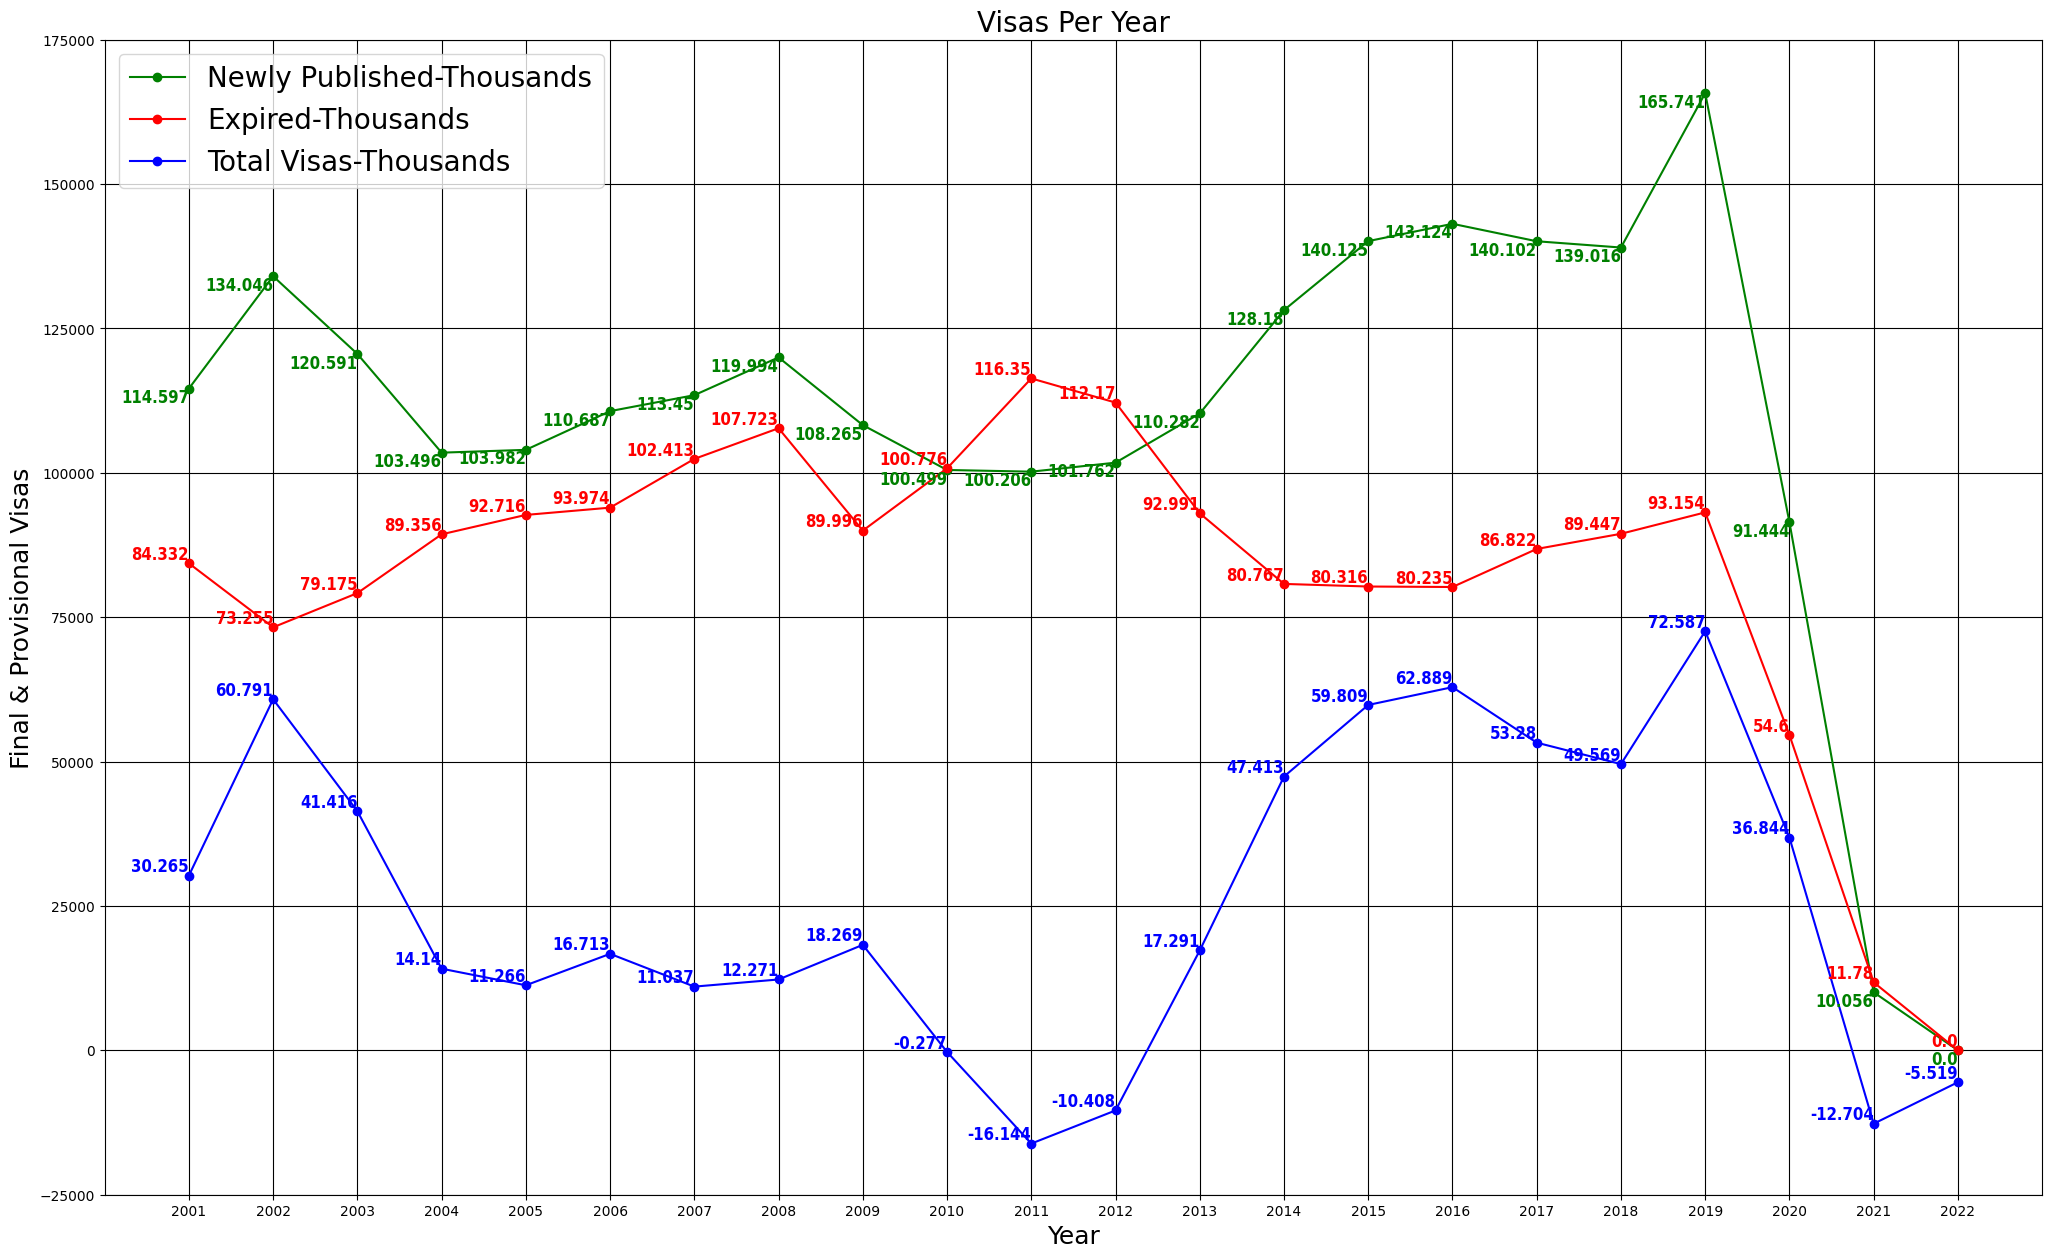

In [44]:
fig,ax=plt.subplots(figsize=(25,15))
plt.plot(visas_df["date"],visas_df["published_finals"],color='green',marker="o");
plt.plot(visas_df["date"],visas_df["expired_finals"],color='red',marker="o");
plt.plot(visas_df["date"],visas_df["visas"],color='blue',marker="o");
plt.xticks(visas_df.date)

for i in range(len(visas_df.date)):
    ax.text(visas_df.date[i],visas_df.published_finals[i],visas_df.published_finals[i]/1000,
    size=12,verticalalignment ='top',horizontalalignment ='right',
    color="g",fontweight="bold",fontstretch="condensed"),
    
    ax.text(visas_df.date[i],visas_df.expired_finals[i],visas_df.expired_finals[i]/1000,
    size=12,verticalalignment ='bottom',horizontalalignment ='right',
    color="r",fontweight="bold",fontstretch="condensed"),
    
    ax.text(visas_df.date[i],visas_df.visas[i],visas_df.visas[i]/1000,
    size=12,verticalalignment ='bottom',horizontalalignment ='right',
    color="b",fontweight="bold",fontstretch="condensed")
ax.set(xlim =(2000,2023), ylim =(-25000, 175000))
plt.title("Visas Per Year",fontsize=20)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Final & Provisional Visas",fontsize=18)
plt.legend(["Newly Published-Thousands","Expired-Thousands","Total Visas-Thousands"],fontsize = 20)
plt.grid(visible=True,color='black')
# plt.minorticks_on()
# plt.grid(visible=True,which="minor") 
plt.savefig("visas_per_year.pdf")

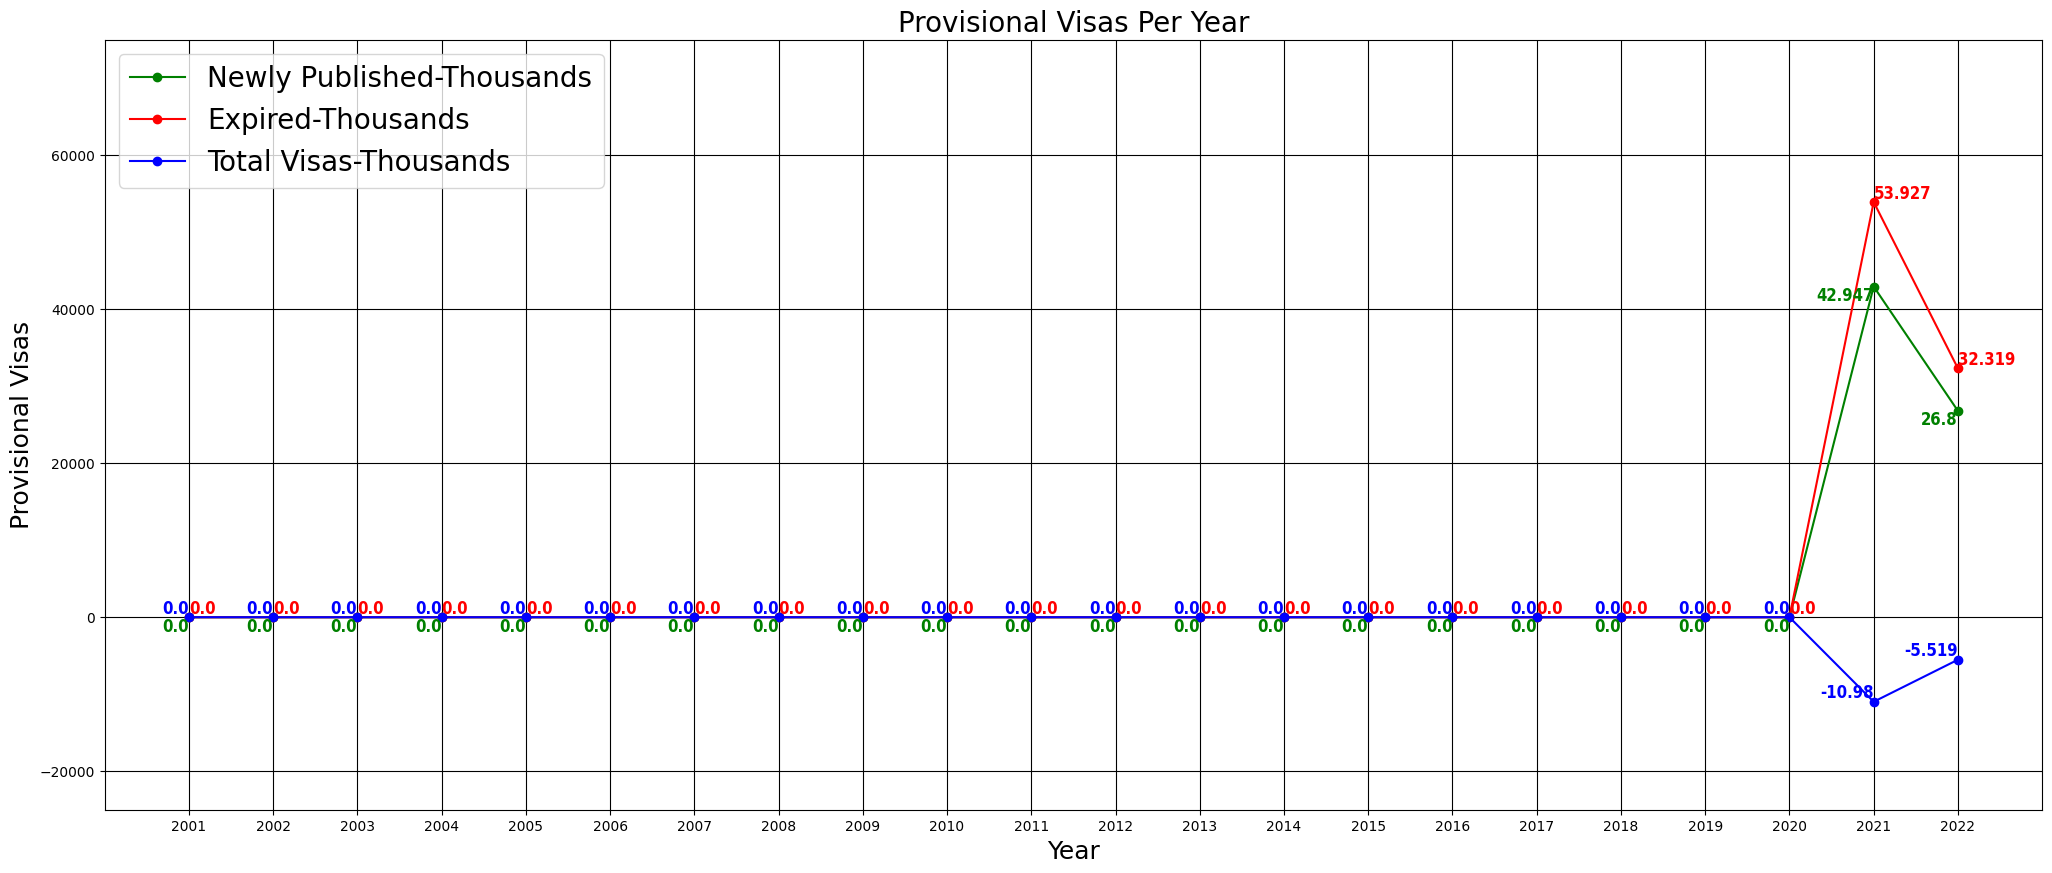

In [45]:
fig,ax=plt.subplots(figsize=(25,10))
plt.plot(visas_df["date"],visas_df["published_provisionals"],color='green',marker="o");
plt.plot(visas_df["date"],visas_df["expired_provisionals"],color='red',marker="o");
plt.plot(visas_df["date"],visas_df["total_provisionals"],color='blue',marker="o");
plt.xticks(visas_df.date)

for i in range(len(visas_df.date)):
    ax.text(visas_df.date[i],visas_df.published_provisionals[i],visas_df.published_provisionals[i]/1000,
    size=12,verticalalignment ='top',horizontalalignment ='right',
    color="g",fontweight="bold",fontstretch="condensed"),
    
    ax.text(visas_df.date[i],visas_df.expired_provisionals[i],visas_df.expired_provisionals[i]/1000,
    size=12,verticalalignment ='bottom',horizontalalignment ='left',
    color="r",fontweight="bold",fontstretch="condensed"),
    
    ax.text(visas_df.date[i],visas_df.total_provisionals[i],visas_df.total_provisionals[i]/1000,
    size=12,verticalalignment ='bottom',horizontalalignment ='right',
    color="b",fontweight="bold",fontstretch="condensed")
ax.set(xlim =(2000,2023), ylim =(-25000, 75000))
plt.title("Provisional Visas Per Year",fontsize=20)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Provisional Visas",fontsize=18)
plt.legend(["Newly Published-Thousands","Expired-Thousands","Total Visas-Thousands"],fontsize = 20,
           loc="upper left")
plt.grid(visible=True,color='black')
# plt.minorticks_on()
# plt.grid(visible=True,which="minor")   
plt.savefig("provisionals_per_year.pdf")

In [87]:
#It was required to tackle the creation of the new "cpdf" dataframe with a more creative way due to the 
#structure of the csv file. Hence the code below.
import csv
my_list = []
with open('C:/Users/kzarb/Desktop/python_data_analysis/immigration_data_analysis/wdb_pop_census_cln.csv',
          newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        x=', '.join(row) 
        x= x.split(',')
        my_list.append(x)

cpdf = pd.DataFrame(my_list).transpose()
cpdf = cpdf.drop([0,1]).reset_index(drop=True)
cpdf =cpdf.rename(columns={0:"date",1:"population"})
cpdf['date'] = cpdf['date'].astype(np.int64)
cpdf['population'] = cpdf['population'].astype(np.int64)
# datatypes = cpdf.dtypes
# print(datatypes)

In [39]:
df_joined = pd.merge(cpdf,visas_df[["date","visas"]],on="date")
# df_joined
# during 2000 the total migrant population was 678813, so at 2001 assuming that the previous analysis
#was correct, we are going to add 678813+30265 only in the first row 0 and at the "visas" column
# https://www.macrotrends.net/countries/NZL/new-zealand/immigration-statistics
#https://data.worldbank.org/indicator/SP.POP.TOTL?end=2021&locations=NZ&start=2000&view=chart
df_joined.at[0,'visas']=df_joined.at[0,'visas']+678813
df_joined

,date,population,visas
0,2001,3880500,709078
1,2002,3948500,60791
2,2003,4027200,41416
3,2004,4087500,14140
4,2005,4133900,11266
5,2006,4184600,16713
6,2007,4223800,11037
7,2008,4259800,12271
8,2009,4302600,18269
9,2010,4350700,-277


In [40]:
#now we are going to change certain things for the new dataframe to make more sense.
#rename df_joined to immigration_stats_2001-2021
immigration_stats_2001_2021 = df_joined
#rename the column "visas" to "migrant_population"
#rename the column "population" to "total_population"
immigration_stats_2001_2021 =immigration_stats_2001_2021.rename(columns={"visas":"migrant_population",
                                                        "population":"total_population"})
#we are going to alter the rows of migrant population using cumulative summation since visas are added
#to the already existing migrant population yearly
immigration_stats_2001_2021.migrant_population=immigration_stats_2001_2021.migrant_population.cumsum()
#we are going to add another column displaying the ration of immigrant to total population
immigration_stats_2001_2021.insert(3,"% of Total Population",
immigration_stats_2001_2021.migrant_population/immigration_stats_2001_2021.total_population*100,False)
immigration_stats_2001_2021

,date,total_population,migrant_population,% of Total Population
0,2001,3880500,709078,18.272851
1,2002,3948500,769869,19.497759
2,2003,4027200,811285,20.145138
3,2004,4087500,825425,20.193884
4,2005,4133900,836691,20.239749
5,2006,4184600,853404,20.393921
6,2007,4223800,864441,20.465955
7,2008,4259800,876712,20.581060
8,2009,4302600,894981,20.800934
9,2010,4350700,894704,20.564599


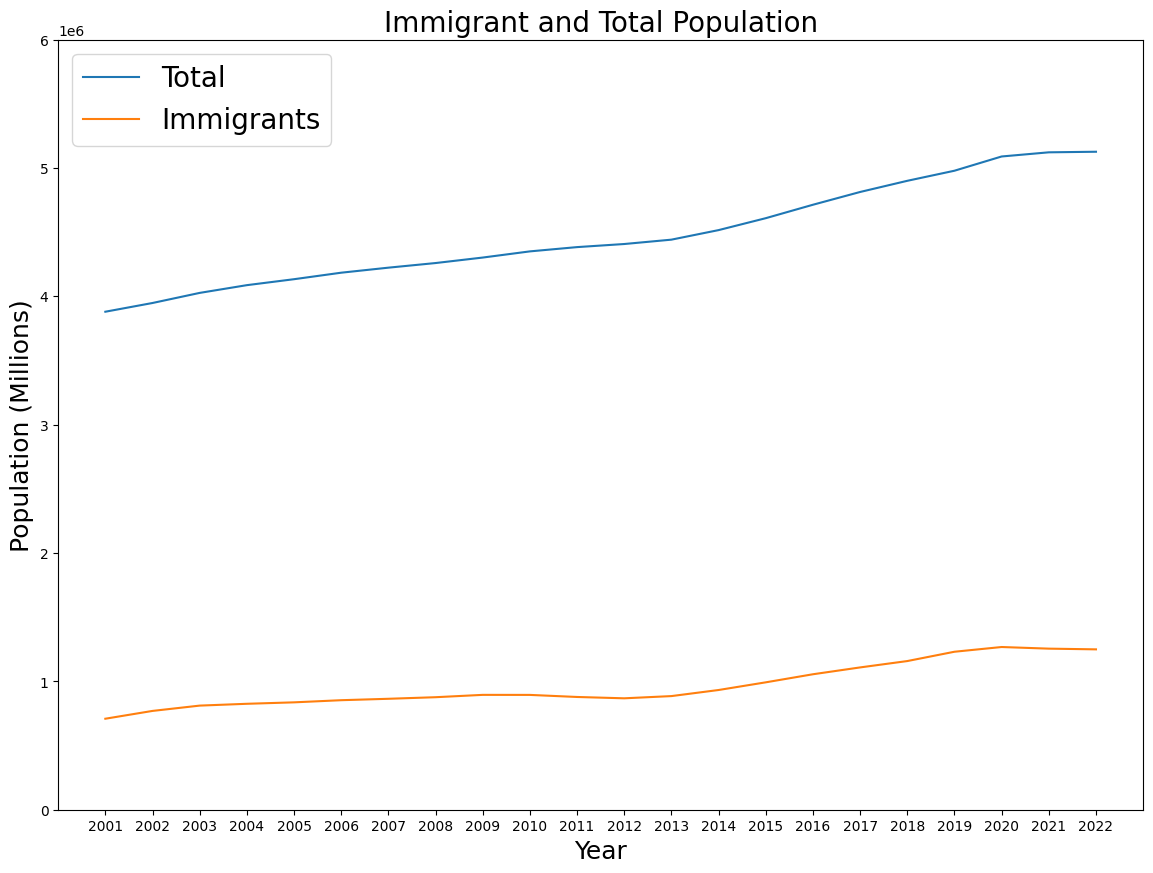

In [41]:
fig,ax =plt.subplots(figsize = (14,10))
plt.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["total_population"])
plt.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["migrant_population"])
plt.xticks(immigration_stats_2001_2021.date)
# plt.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["% of Total Population"])
ax.set(xlim=(2000,2023),ylim=(0,6000000))
plt.title("Immigrant and Total Population",fontsize=20)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Population (Millions)",fontsize=18)
plt.legend(["Total","Immigrants"],fontsize = 20,
           loc="upper left")

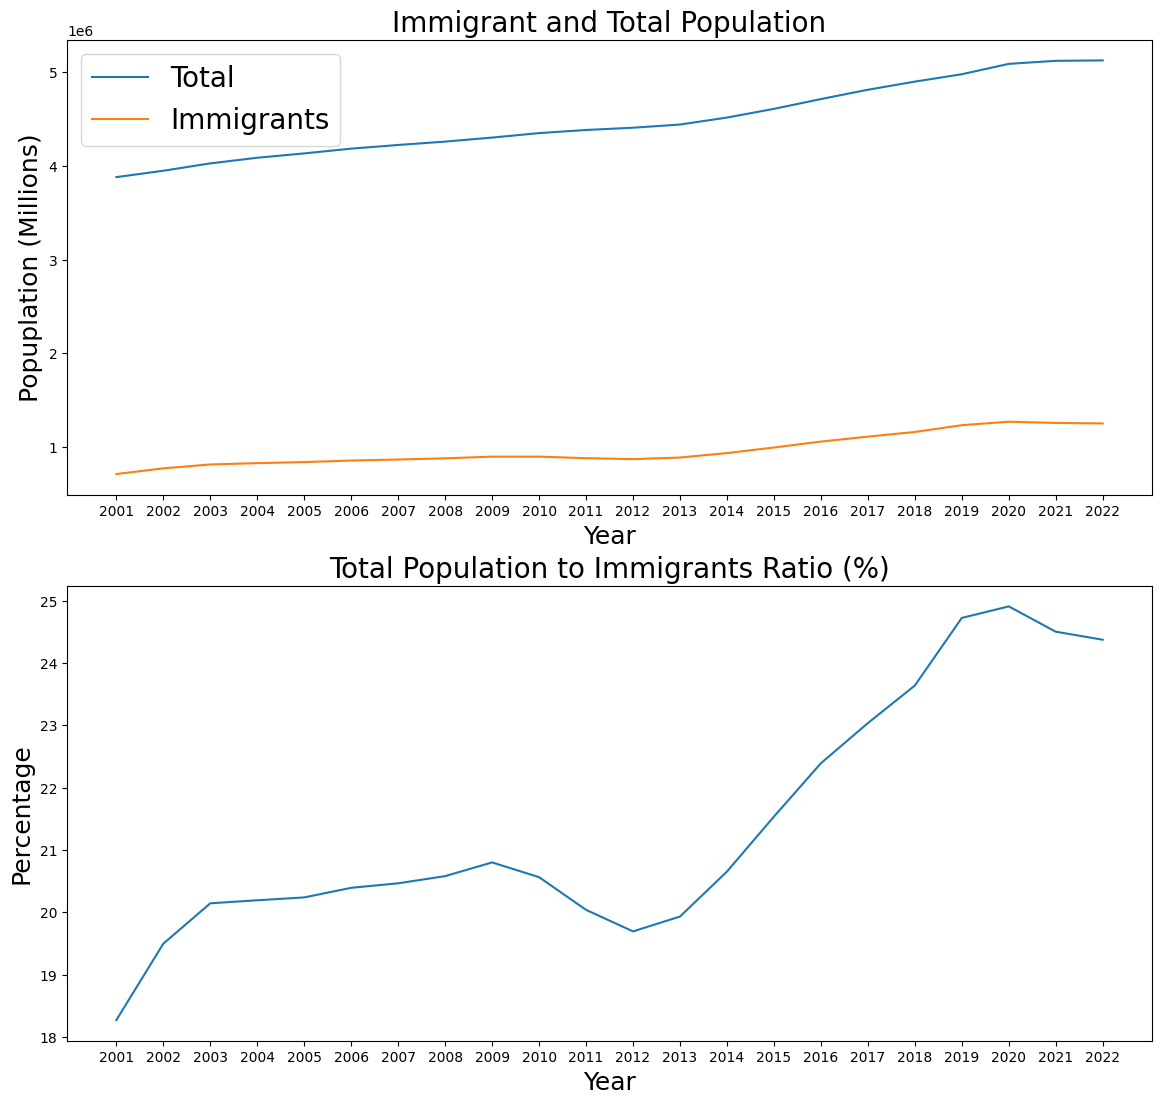

In [46]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(14,13))

ax1.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["total_population"])
ax1.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["migrant_population"])
ax2.plot(immigration_stats_2001_2021["date"],immigration_stats_2001_2021["% of Total Population"])
ax1.set_xticks(immigration_stats_2001_2021.date)


ax1.set_title("Immigrant and Total Population",fontsize=20)
ax1.legend(["Total","Immigrants"],fontsize = 20,loc="upper left")
ax1.set_xlabel("Year",fontsize=18)
ax1.set_ylabel("Popuplation (Millions)",fontsize=18)
ax1.set_xticks(immigration_stats_2001_2021.date)

ax2.set_title("Total Population to Immigrants Ratio (%)",fontsize=20)
ax2.set_xlabel("Year",fontsize=18)
ax2.set_ylabel("Percentage",fontsize=18)
ax2.set_xticks(immigration_stats_2001_2021.date)
plt.savefig("immigrant_to_total_pop_%.pdf")

Below we are going to see the amount of incoming immigrants in terms of age and gender

In [48]:
#0-4
male_0_4=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "0-4 years")].sum()
female_0_4=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "0-4 years")].sum()
#5-9
male_5_9=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "5-9 years")].sum()
female_5_9=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "5-9 years")].sum()
#10-14
male_10_14=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "10-14 years")].sum()
female_10_14=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "10-14 years")].sum()
#15-19
male_15_19=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "15-19 years")].sum()
female_15_19=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "15-19 years")].sum()
#20-24
male_20_24=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "20-24 years")].sum()
female_20_24=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "20-24 years")].sum()
#25-29
male_25_29=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "25-29 years")].sum()
female_25_29=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "25-29 years")].sum()
#30-34
male_30_34=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "30-34 years")].sum()
female_30_34=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "30-34 years")].sum()
#35-39
male_35_39=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "35-39 years")].sum()
female_35_39=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "35-39 years")].sum()
#40-44
male_40_44=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "40-44 years")].sum()
female_40_44=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "40-44 years")].sum()
#45-49
male_45_49=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "45-49 years")].sum()
female_45_49=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "45-49 years")].sum()
#50-54
male_50_54=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "50-54 years")].sum()
female_50_54=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "50-54 years")].sum()
#55-59
male_55_59=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "55-59 years")].sum()
female_55_59=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "55-59 years")].sum()
#60-64
male_60_64=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "60-64 years")].sum()
female_60_64=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "60-64 years")].sum()
#65-69
male_65_69=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "65-69 years")].sum()
female_65_69=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "65-69 years")].sum()
#70-74
male_70_74=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "70-74 years")].sum()
female_70_74=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "70-74 years")].sum()
#75-79
male_75_79=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "75-79 years")].sum()
female_75_79=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "75-79 years")].sum()
#80-84
male_80_84=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "80-84 years")].sum()
female_80_84=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "80-84 years")].sum()
#85-89
male_85_89=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "85-89 years")].sum()
female_85_89=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "85-89 years")].sum()
#90plus
male_90plus=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "90+ years")].sum()
female_90plus=df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "90+ years")].sum()
#Verification
male_total = df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Male")&(df.age == "TOTAL")].sum()
female_total = df.estimate.loc[(df.direction == "Arrivals")&(df.sex == "Female")&(df.age == "TOTAL")].sum()
df_sex_total = df.estimate.loc[(df.direction=="Arrivals")&(df.sex=="TOTAL")&(df.age=="TOTAL")].sum()
male_calc_total = male_0_4.sum()+male_5_9.sum()+male_10_14.sum()+male_15_19+male_20_24.sum()+male_25_29.sum()+male_30_34.sum()+male_35_39.sum()+male_40_44.sum()+male_45_49.sum()+male_50_54.sum()+male_55_59.sum()+male_60_64.sum()+male_65_69.sum()+male_70_74.sum()+male_75_79.sum()+male_80_84.sum()+male_85_89.sum()+male_90plus.sum()
female_calc_total = female_0_4.sum()+female_5_9.sum()+female_10_14.sum()+female_15_19+female_20_24.sum()+female_25_29.sum()+female_30_34.sum()+female_35_39.sum()+female_40_44.sum()+female_45_49.sum()+female_50_54.sum()+female_55_59.sum()+female_60_64.sum()+female_65_69.sum()+female_70_74.sum()+female_75_79.sum()+female_80_84.sum()+female_85_89.sum()+female_90plus.sum()

print("="*90)
print(f'unique age values :{df.age.unique()}')
print("="*90)
print(f'male0-4:{male_0_4}|male 35-39: {male_35_39}|male 65-69:{male_65_69}|\n',
      f'female0-4:{female_0_4}|female 35-39: {female_35_39}|female 65-69:{female_65_69}\n',
      f'\n',      
    f'male5-9:{male_5_9}|male 40-44: {male_40_44}|male70-74:{male_70_74}\n',
      f'female5-9:{female_5_9}|female 40-44: {female_40_44}|female70-74:{female_70_74}\n',
      f'\n',
     f'male10-14:{male_10_14}|male 45-49: {male_45_49}|male75_79:{male_75_79}\n',
      f'female10-14:{female_10_14}|female 45-49: {female_45_49}|female75_79:{female_75_79}\n',
     f'\n',
     f'male20-24:{male_20_24}|male 50-54: {male_50_54}|male80-84:{male_80_84}\n',
      f'female20-24:{female_20_24}|female 50-54: {female_50_54}|female80-48:{female_80_84}\n',
      f'\n',
     f'male25-29:{male_25_29}|male 55-59:{male_55_59}|male85_89:{male_85_89}\n',
      f'female25-29:{female_25_29}|female 55-59: {female_55_59}|female85_89:{female_85_89}\n',
      f'\n',
     f'male30-34:{male_30_34}|male 60-64:{male_60_64}|male 90+:{male_90plus}\n',
      f'female30-34:{female_30_34}|female 60-64: {female_60_64}|female 90+:{female_90plus}\n'
     f'male15-19:{male_15_19}',
     f'female15-19:{female_15_19}')
print("="*90)
print(f'male calculated total:{male_calc_total}|female calculated total:{female_calc_total}\n',
      f'Calculated Total sex Arrivals:{male_calc_total+female_calc_total}\n',
      f'male given total:{male_total}|female given total:{female_total}\n',
      f'Given Total sex Arrivals men+women:{male_total+female_total}\n',
      f'Given Total sex Arrivals:{df_sex_total}\n')

unique age values :['0-4 years' '10-14 years' '15-19 years' '20-24 years' '25-29 years'
 '30-34 years' '35-39 years' '40-44 years' '45-49 years' '50-54 years'
 '55-59 years' '5-9 years' '60-64 years' '65-69 years' '70-74 years'
 '75-79 years' '80-84 years' '85-89 years' '90+ years' 'TOTAL']
male0-4:84276|male 35-39: 109778|male 65-69:19614|
 female0-4:79706|female 35-39: 99742|female 65-69:18834
 
 male5-9:71967|male 40-44: 81721|male70-74:10213
 female5-9:68554|female 40-44: 69687|female70-74:10245
 
 male10-14:69341|male 45-49: 55969|male75_79:5363
 female10-14:64358|female 45-49: 46569|female75_79:5950
 
 male20-24:175785|male 50-54: 40055|male80-84:2437
 female20-24:164715|female 50-54: 38010|female80-48:3192
 
 male25-29:203570|male 55-59:32845|male85_89:997
 female25-29:217943|female 55-59: 36169|female85_89:1380
 
 male30-34:154328|male 60-64:28882|male 90+:453
 female30-34:148159|female 60-64: 30096|female 90+:636
male15-19:118005 female15-19:99843
male calculated total:1265599

The list comprehension below was an attempt to manipulate the data in a more dynamic way

In [49]:
labels=df.age.unique()
print(labels)
labels = list(labels)
sorted_labels=[]
for i in labels:
    if i != "5-9 years" and i !="TOTAL":
        sorted_labels.insert(0,i)
    elif i == "5-9 years":
        remaining = labels.pop(labels.index(i))
        
sorted_labels.reverse()
sorted_labels.insert(1,remaining)
labels = [s.strip(" years") for s in sorted_labels]
print(labels)

['0-4 years' '10-14 years' '15-19 years' '20-24 years' '25-29 years'
 '30-34 years' '35-39 years' '40-44 years' '45-49 years' '50-54 years'
 '55-59 years' '5-9 years' '60-64 years' '65-69 years' '70-74 years'
 '75-79 years' '80-84 years' '85-89 years' '90+ years' 'TOTAL']
['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']


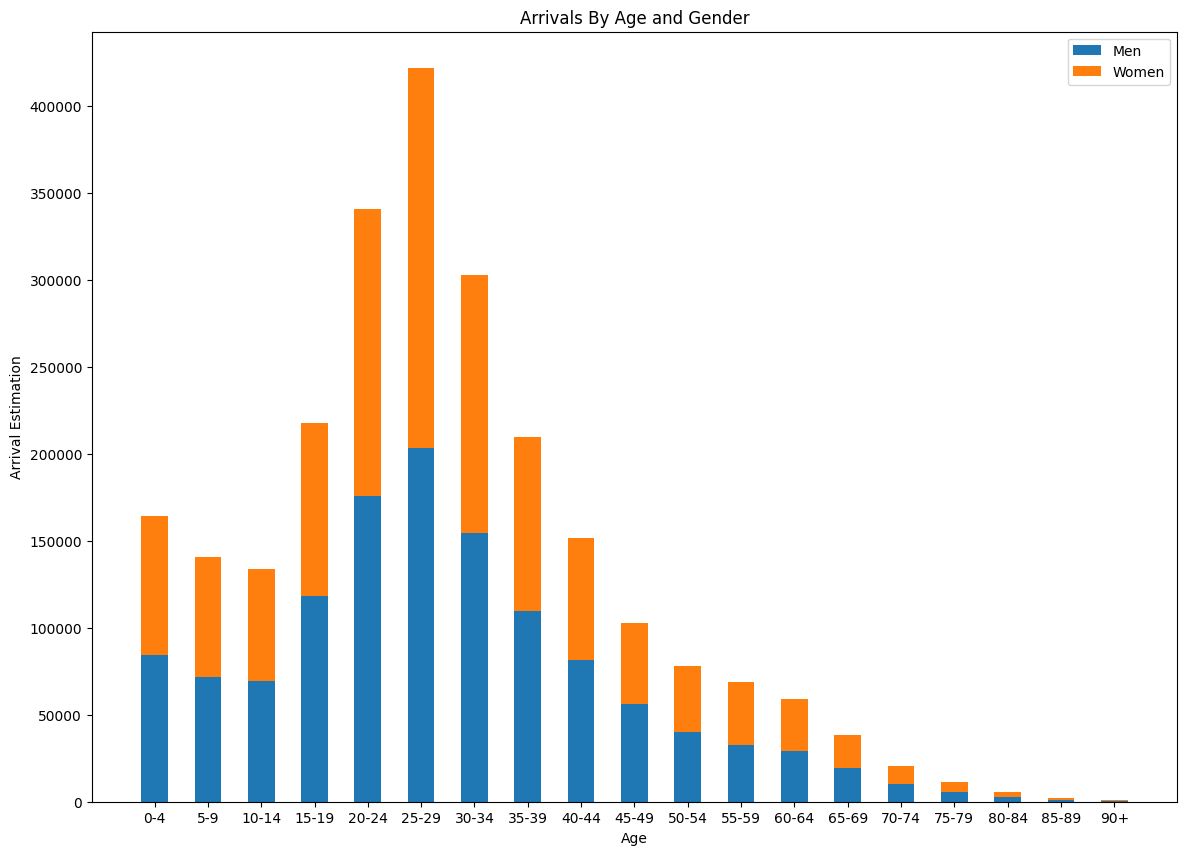

In [51]:
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39',
          '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90+']

men = [male_0_4,male_5_9,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,
       male_45_49,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,
       male_85_89,male_90plus]
women = [female_0_4,female_5_9,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,
         female_35_39,female_40_44,female_45_49,female_50_54,female_55_59,female_60_64,female_65_69,
         female_70_74,female_75_79,female_80_84,female_85_89,female_90plus]
width = 0.50

fig,ax = plt.subplots(figsize=(14,10))

ax.bar(labels, men, width,label='Men')
ax.bar(labels, women, width,bottom=men,label='Women')

ax.set_ylabel('Arrival Estimation')
ax.set_xlabel('Age')
ax.set_title('Arrivals By Age and Gender')
ax.legend()
plt.savefig("arrivals_by_age_and_gender.pdf")